In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# import data
data = pd.read_csv(r"D:\Data Science\MACHINE LEARNING\Assignment\Assignment-3 Linear Models\House Rental Prediction\House_rental.csv")
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [4]:
data.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [5]:
# To check null value
data.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [6]:
# To drop values
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [8]:
# To check duplicate values
data.duplicated().sum()

66

In [9]:
# To drop duplicate values
data=data.drop_duplicates()

In [10]:
data.duplicated().sum()

0

In [11]:
# splitting data
from sklearn.model_selection import train_test_split
y = data['Price']
X = data.drop(['Price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [12]:
print("x_train shape :",X_train.shape)
print("x_test shape : ",X_test.shape)
print("y_train shape :",y_train.shape)
print("y_test shape :",y_test.shape)

x_train shape : (387, 6)
x_test shape :  (192, 6)
y_train shape : (387,)
y_test shape : (192,)


In [13]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

In [14]:
# Linear Regression



lm1 = LinearRegression()
lm1.fit(X_train,y_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

LinearRegression()

In [15]:
# predictions

lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)

In [31]:
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, lm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, lm2_pred))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(lm2_pred), 'Actual_Rent': np.exp(y2_test)})



Linear Regression Performance:

all features, No scaling:
MAE: 15395.143607611462
RMSE: 21846.00421923301
R2_Score:  0.5440078124890438

all features, with scaling:
MAE: 16310.542828229007
RMSE: 23395.86374652933
R2_Score:  0.4770122186649993


C:\Users\91897\AppData\Local\Temp\ipykernel_1360\3508257952.py:13: RuntimeWarning: overflow encountered in exp
  pred = pd.DataFrame(data={'Predicted_Rent': np.exp(lm2_pred), 'Actual_Rent': np.exp(y2_test)})
D:\Data Science\edyodha packages\conda.2022\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


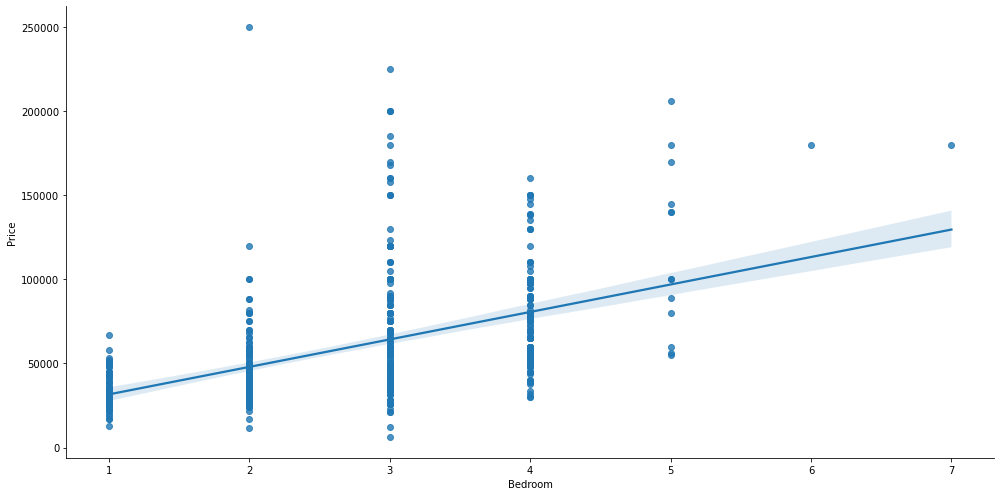

In [18]:
b=sns.lmplot(x='Bedroom', y='Price', data=data, aspect=2, height=7,)
b

In [19]:
# cchecking co-relation
a=data.corr()
a

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Sqft,1.000000,0.118568,0.304795,0.613589,0.458412,0.725545,0.823781
Floor,0.118568,1.000000,0.552552,0.039165,-0.025554,0.088359,0.226952
TotalFloor,0.304795,0.552552,1.000000,0.079984,0.023659,0.141258,0.336982
Bedroom,0.613589,0.039165,0.079984,1.000000,0.527463,0.650881,0.465091
Living.Room,0.458412,-0.025554,0.023659,0.527463,1.000000,0.559363,0.332643
Bathroom,0.725545,0.088359,0.141258,0.650881,0.559363,1.000000,0.604204
Price,0.823781,0.226952,0.336982,0.465091,0.332643,0.604204,1.000000


C:\Users\91897\AppData\Local\Temp\ipykernel_1360\2836813970.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


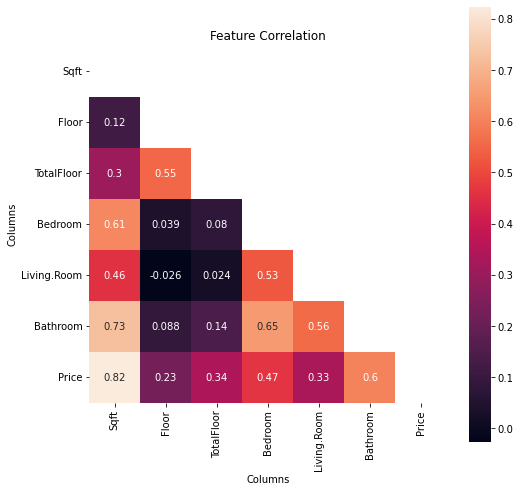

In [20]:
corr_matrix = data.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

fig, ax = plt.subplots(figsize=(8,8)) 

sns.heatmap(corr_matrix, 
            annot=True, 
            square=True,
            fmt='.2g',
            mask=mask,
            ax=ax).set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')

ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

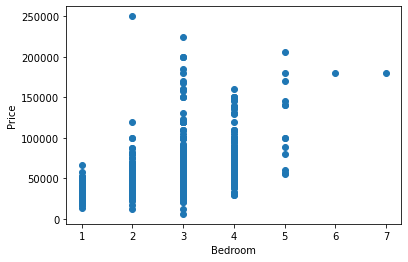

In [21]:
plt.scatter(data.Bedroom, data.Price)
plt.xlabel('Bedroom')
plt.ylabel('Price')
plt.show()

<AxesSubplot:>

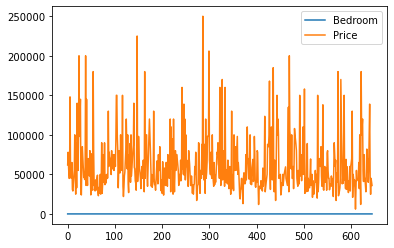

In [22]:

a = data.loc[:, ['Bedroom', 'Price']]
a.plot()

D:\Data Science\edyodha packages\conda.2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Data Science\edyodha packages\conda.2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Data Science\edyodha packages\conda.2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

<AxesSubplot:xlabel='Floor'>

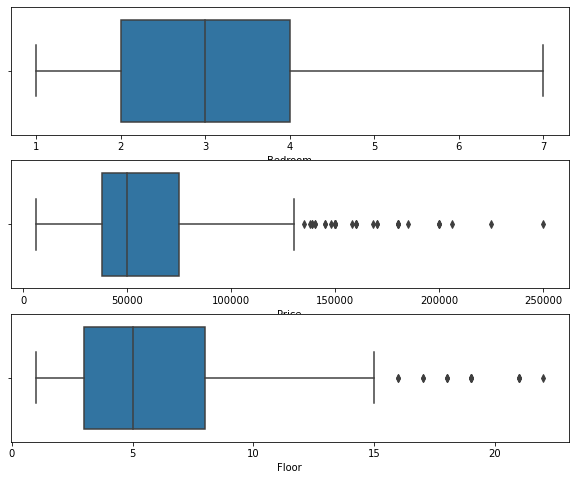

In [23]:
fig, axs = plt.subplots(3, figsize = (10,8))
sns.boxplot(data['Bedroom'], ax = axs[0])
sns.boxplot(data['Price'],  ax = axs[1])
sns.boxplot(data['Floor'],  ax = axs[2])

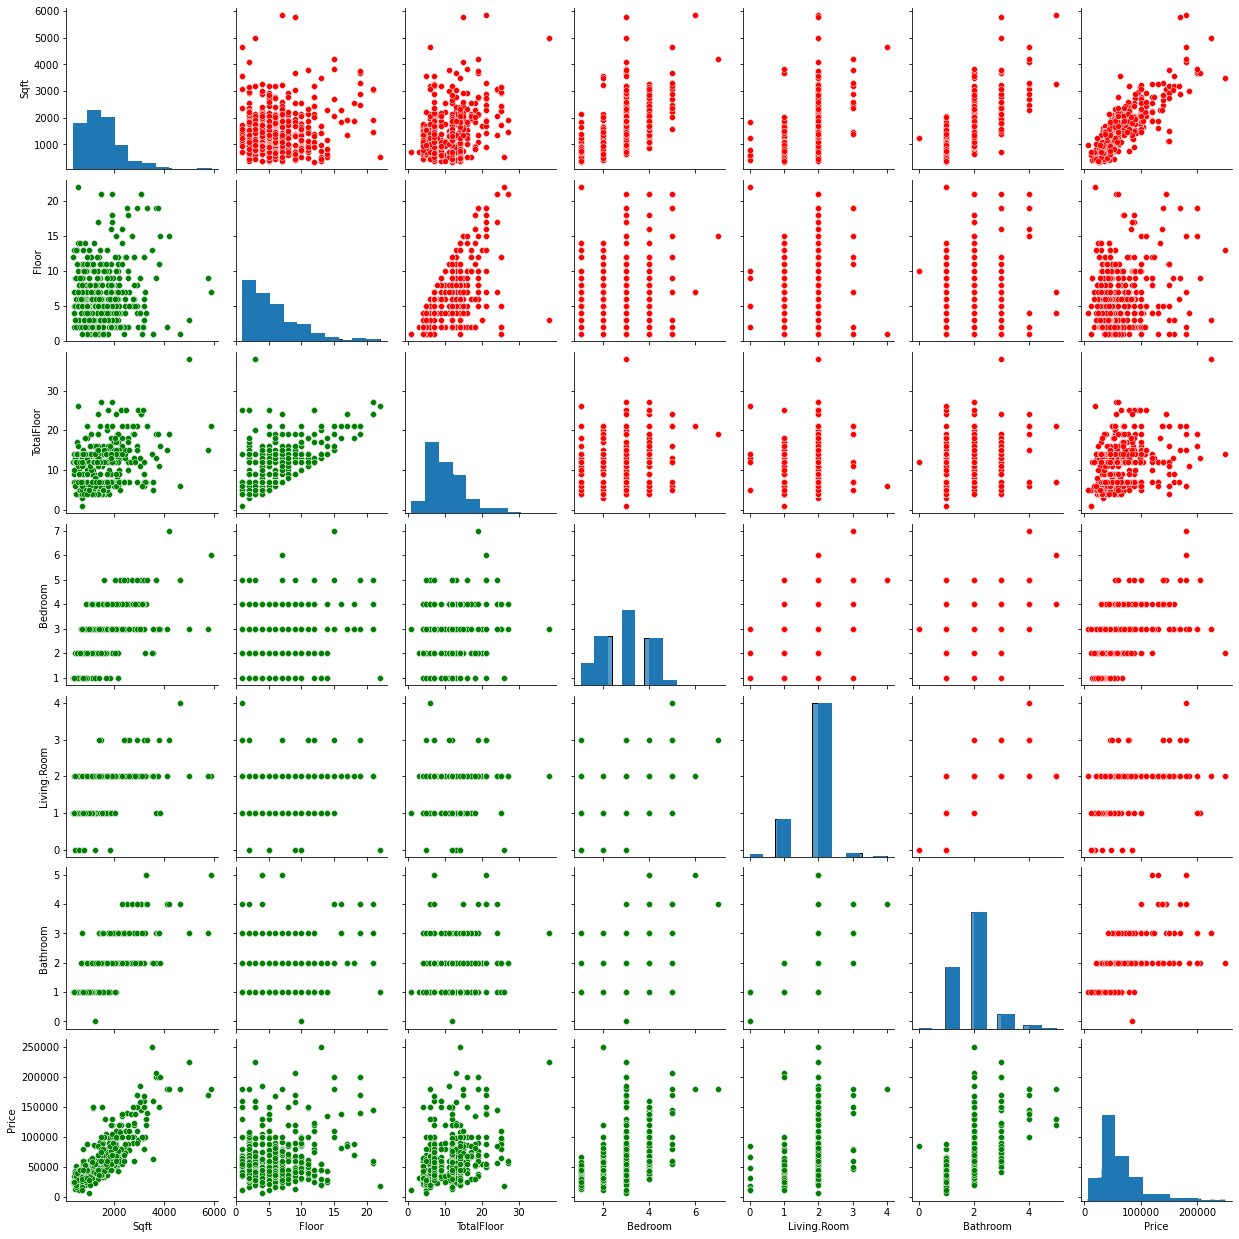

In [25]:
b=sns.pairplot(data)

b.map_upper(sns.scatterplot,color='red')
b.map_lower(sns.scatterplot, color='green')
b.map_diag(plt.hist)